In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('Food_Delivery_Dataset.csv')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           45593 non-null  object 
 1   delivery_person_id           45593 non-null  object 
 2   delivery_person_age          43739 non-null  float64
 3   delivery_person_ratings      43685 non-null  float64
 4   restaurant_latitude          45593 non-null  float64
 5   restaurant_longitude         45593 non-null  float64
 6   delivery_location_latitude   45593 non-null  float64
 7   delivery_location_longitude  45593 non-null  float64
 8   order_date                   45593 non-null  object 
 9   time_orderd                  43862 non-null  object 
 10  time_order_picked            45593 non-null  object 
 11  weather_conditions           44977 non-null  object 
 12  road_traffic_density         44992 non-null  object 
 13  vehicle_conditio

In [37]:
df.sample(5)

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,time_order_picked,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken_min
16888,0x3aa4,VADRES03DEL01,20.0,4.0,22.320000,73.170000,22.330000,73.180000,17-03-2022,8:30,8:35,Windy,Low,0,Drinks,motorcycle,1.0,No,Urban,25.0
9998,0x3e7a,JAPRES18DEL02,37.0,5.0,26.913987,75.752891,26.963987,75.802891,17-03-2022,21:30,21:40,Sandstorms,Jam,2,Meal,scooter,0.0,No,Metropolitian,31.0
7099,0x3962,BANGRES19DEL02,31.0,4.3,12.914264,77.678400,12.994264,77.758400,08-03-2022,19:55,20:10,Sandstorms,Jam,0,Meal,motorcycle,1.0,No,Semi-Urban,49.0
11784,0x4f9b,CHENRES17DEL02,39.0,5.0,13.045479,80.233110,13.095479,80.283110,05-04-2022,17:25,17:35,Fog,Medium,0,Meal,motorcycle,1.0,No,Metropolitian,27.0
32965,0x3bb1,HYDRES09DEL02,20.0,5.0,17.431668,78.408321,17.561668,78.538321,06-04-2022,20:15,20:25,Windy,Jam,1,Snack,scooter,1.0,No,Metropolitian,26.0


In [38]:
df.isna().sum()

id                                0
delivery_person_id                0
delivery_person_age            1854
delivery_person_ratings        1908
restaurant_latitude               0
restaurant_longitude              0
delivery_location_latitude        0
delivery_location_longitude       0
order_date                        0
time_orderd                    1731
time_order_picked                 0
weather_conditions              616
road_traffic_density            601
vehicle_condition                 0
type_of_order                     0
type_of_vehicle                   0
multiple_deliveries             993
festival                        228
city                           1200
time_taken_min                    0
dtype: int64

In [39]:
# Grouping columns by type
cats = ['id', 'delivery_person_id', 'weather_conditions', 'road_traffic_density', 'type_of_order', 'type_of_vehicle', 'festival', 'city']
nums = ['delivery_person_age', 'delivery_person_ratings', 'vehicle_condition', 'multiple_deliveries', 'time_taken_min']
timestamp = ['order_date', 'time_orderd', 'time_order_picked']
geoloc = ['restaurant_latitude', 'restaurant_longitude', 'delivery_location_latitude', 'delivery_location_longitude']

In [40]:
# Statistical summary from numerical columns
df[nums].describe()

,delivery_person_age,delivery_person_ratings,vehicle_condition,multiple_deliveries,time_taken_min
count,43739.000000,43685.000000,45593.000000,44600.000000,45593.000000
mean,29.567137,4.633780,1.023359,0.744664,26.294607
std,5.815155,0.334716,0.839065,0.572473,9.383806
min,15.000000,1.000000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,1.000000,1.000000,26.000000
75%,35.000000,4.900000,2.000000,1.000000,32.000000
max,50.000000,6.000000,3.000000,3.000000,54.000000


In [41]:
# categorical columns 
df[cats].describe()

,id,delivery_person_id,weather_conditions,road_traffic_density,type_of_order,type_of_vehicle,festival,city
count,45593,45593,44977,44992,45593,45593,45365,44393
unique,45593,1320,6,4,4,4,2,3
top,0x6b1a,JAPRES11DEL02,Fog,Low,Snack,motorcycle,No,Metropolitian
freq,1,67,7654,15477,11533,26435,44469,34093


In [42]:
# since they're too few, we can drop it
df.dropna(inplace=True, subset=['festival'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45365 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           45365 non-null  object 
 1   delivery_person_id           45365 non-null  object 
 2   delivery_person_age          43521 non-null  float64
 3   delivery_person_ratings      43468 non-null  float64
 4   restaurant_latitude          45365 non-null  float64
 5   restaurant_longitude         45365 non-null  float64
 6   delivery_location_latitude   45365 non-null  float64
 7   delivery_location_longitude  45365 non-null  float64
 8   order_date                   45365 non-null  object 
 9   time_orderd                  43643 non-null  object 
 10  time_order_picked            45365 non-null  object 
 11  weather_conditions           44752 non-null  object 
 12  road_traffic_density         44767 non-null  object 
 13  vehicle_conditio

In [44]:
# imputation of categorical columns based on mode
df['delivery_person_ratings'].fillna(df['delivery_person_ratings'].mode()[0], inplace=True)
df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0], inplace=True)
df['weather_conditions'].fillna(df['weather_conditions'].mode()[0], inplace=True)
df['city'].fillna(df['city'].mode()[0], inplace=True)
df['time_orderd'].fillna(df['time_orderd'].mode()[0], inplace=True)
df['road_traffic_density'].fillna(df['road_traffic_density'].mode()[0], inplace=True)

In [45]:
# imputation of numerical columns based on mean
df['delivery_person_age'].fillna(df['delivery_person_age'].mean(), inplace=True)

In [46]:
# check for duplicated rows in every columns
df.duplicated().sum()

0

In [47]:
df.duplicated(subset=['delivery_person_id']).sum()

44045

In [48]:
from scipy import stats

In [49]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['delivery_person_age',	'delivery_person_ratings']:
    zscore = abs(stats.zscore(df[col])) # calculating absolute z-score
    filtered_entries = (zscore < 3) & filtered_entries # keep those which has absolute z-score below 3
    
df = df[filtered_entries] # filter, only take data which has z-score below 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 45365
Jumlah baris setelah memfilter outlier: 44595


In [50]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['delivery_person_age',	'delivery_person_ratings']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 44595
Jumlah baris setelah memfilter outlier: 40020


<Axes: xlabel='delivery_person_age', ylabel='Density'>

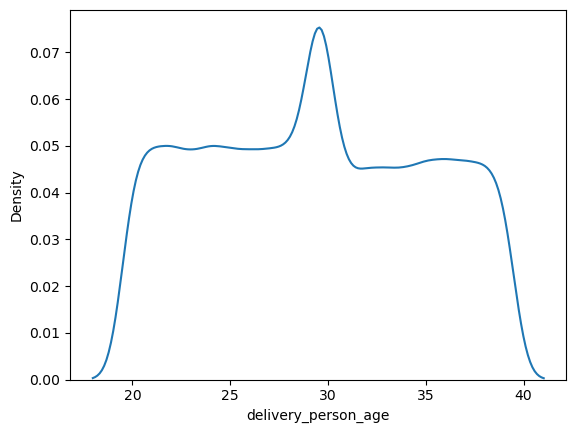

In [51]:
# distribution of salary (real values)
sns.kdeplot(df['delivery_person_age'])

<Axes: xlabel='delivery_person_age', ylabel='Density'>

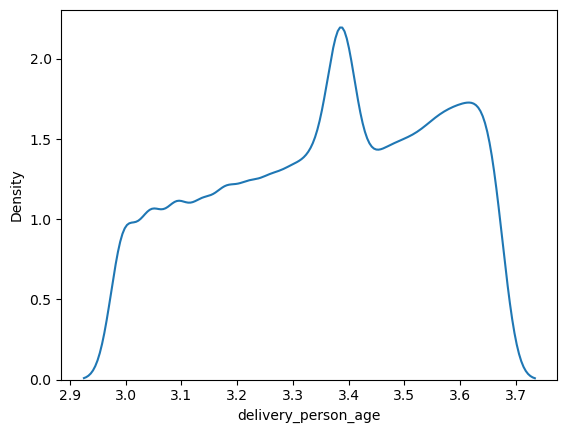

In [52]:
# distribution of salary (after log transformation)
sns.kdeplot(np.log(df['delivery_person_age']))
# seems closer to normal distribution!

In [53]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [54]:
# re-scalling weight & height
df['delivery_person_age_norm'] = MinMaxScaler().fit_transform(df['delivery_person_age'].values.reshape(len(df), 1))

# standardization of age and salary log (since their distribution is approaching to normal)
df['delivery_person_age_std'] = StandardScaler().fit_transform(df['delivery_person_age'].values.reshape(len(df), 1))

In [55]:
df[['delivery_person_age','delivery_person_age_std','delivery_person_age_norm']].describe()

,delivery_person_age,delivery_person_age_std,delivery_person_age_norm
count,40020.000000,4.002000e+04,40020.000000
mean,29.322047,-4.616220e-17,0.490634
std,5.626224,1.000012e+00,0.296117
min,20.000000,-1.656913e+00,0.000000
25%,25.000000,-7.682064e-01,0.263158
50%,29.588566,4.737154e-02,0.504661
75%,34.000000,8.314656e-01,0.736842
max,39.000000,1.720172e+00,1.000000


In [56]:
# label encoder on road_traffic_density, city and weather_conditions
df['weather_conditions'] = df['weather_conditions'].astype('category').cat.codes
df['road_traffic_density'] = df['road_traffic_density'].astype('category').cat.codes
df['city'] = df['city'].astype('category').cat.codes
df['festival'] = df['festival'].astype('category').cat.codes

In [57]:
# type_of_order	type_of_vehicle
for cat in ['type_of_order','type_of_vehicle']:
  onehots = pd.get_dummies(df[cat], prefix=cat)
  df = df.join(onehots)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40020 entries, 0 to 45592
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                40020 non-null  object 
 1   delivery_person_id                40020 non-null  object 
 2   delivery_person_age               40020 non-null  float64
 3   delivery_person_ratings           40020 non-null  float64
 4   restaurant_latitude               40020 non-null  float64
 5   restaurant_longitude              40020 non-null  float64
 6   delivery_location_latitude        40020 non-null  float64
 7   delivery_location_longitude       40020 non-null  float64
 8   order_date                        40020 non-null  object 
 9   time_orderd                       40020 non-null  object 
 10  time_order_picked                 40020 non-null  object 
 11  weather_conditions                40020 non-null  int8   
 12  road

In [59]:
# drop the real categorical columns (since it was already encoded)
df_new = df.drop(columns=['type_of_order','type_of_vehicle']).copy()

In [60]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40020 entries, 0 to 45592
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                40020 non-null  object 
 1   delivery_person_id                40020 non-null  object 
 2   delivery_person_age               40020 non-null  float64
 3   delivery_person_ratings           40020 non-null  float64
 4   restaurant_latitude               40020 non-null  float64
 5   restaurant_longitude              40020 non-null  float64
 6   delivery_location_latitude        40020 non-null  float64
 7   delivery_location_longitude       40020 non-null  float64
 8   order_date                        40020 non-null  object 
 9   time_orderd                       40020 non-null  object 
 10  time_order_picked                 40020 non-null  object 
 11  weather_conditions                40020 non-null  int8   
 12  road

C:\Users\AnythingAnywhere\AppData\Local\Temp\ipykernel_7724\1462277101.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new.corr(), cmap='Blues', annot=True, fmt='.2f')


<Axes: >

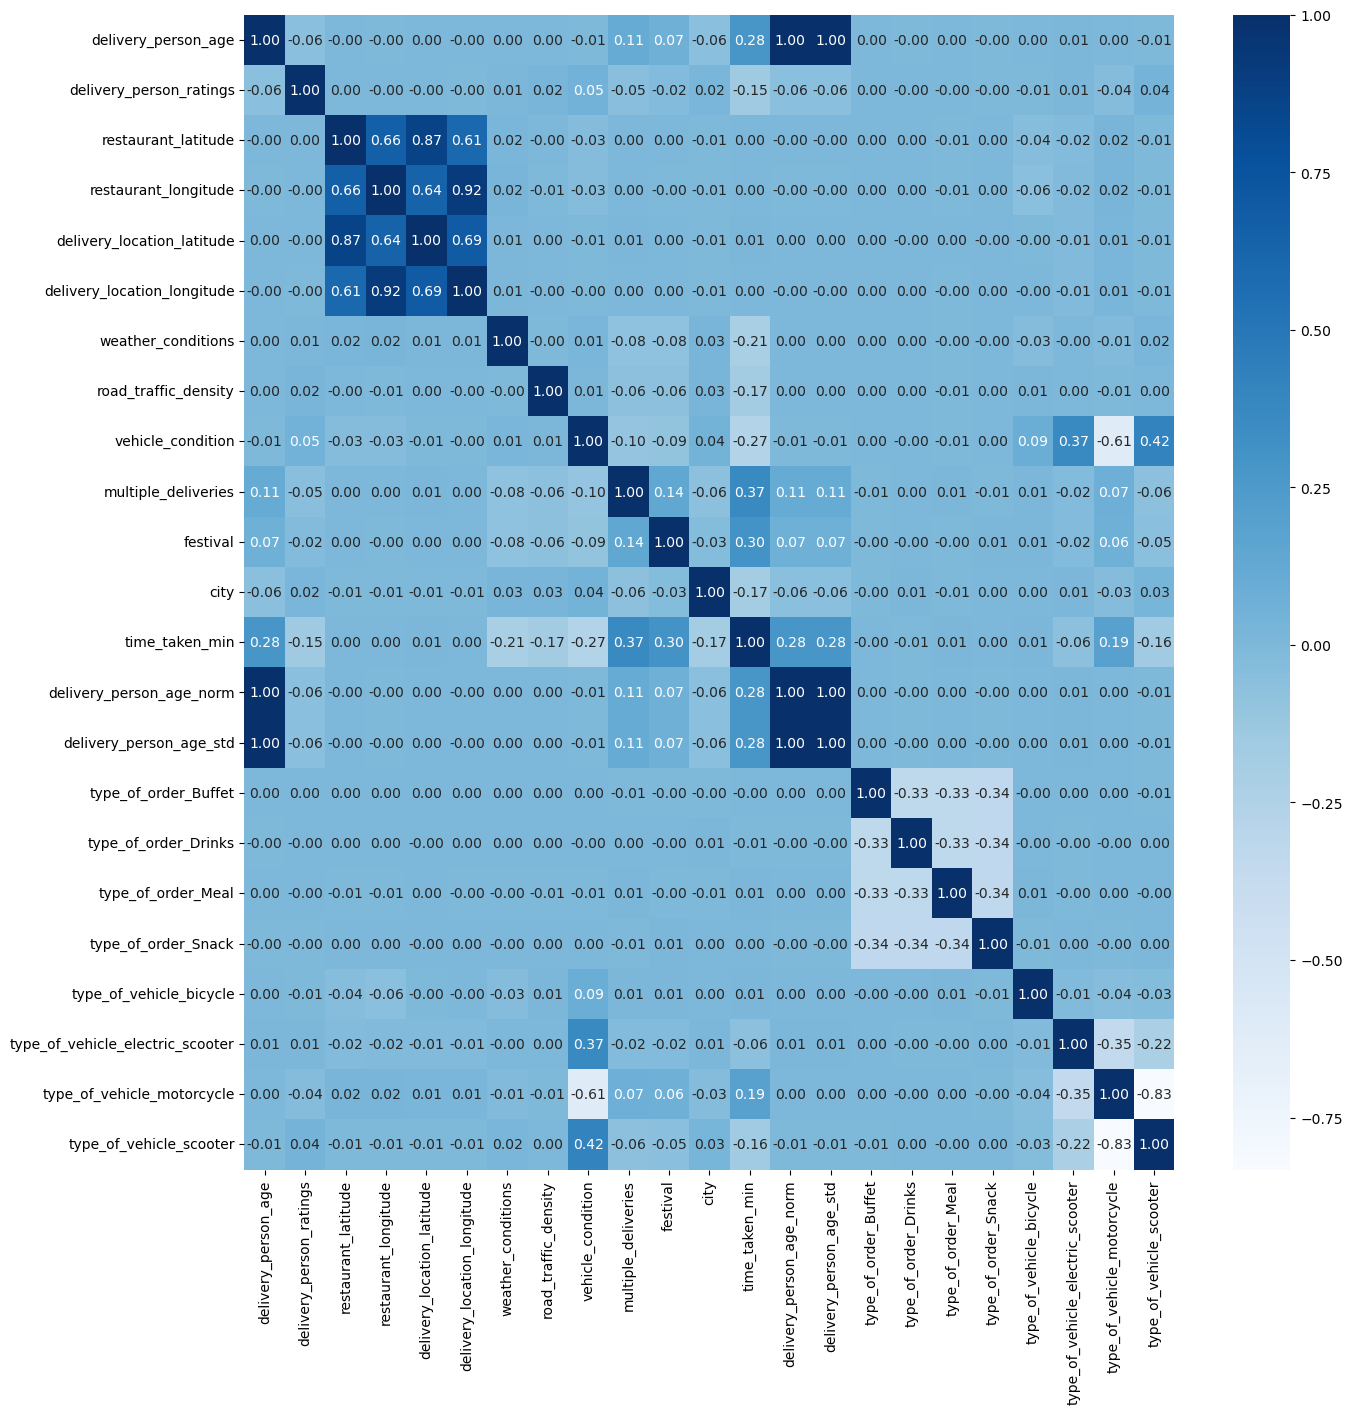

In [61]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_new.corr(), cmap='Blues', annot=True, fmt='.2f')

In [62]:
drop_columns = ['id', 'delivery_person_id', 'time_taken_min','type_of_vehicle_scooter','delivery_person_age', 'delivery_person_age_norm'] + geoloc + timestamp

In [63]:
# separation of features vs target
X = df_new.drop(drop_columns, axis=1)
y = df_new['time_taken_min'].values

In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40020 entries, 0 to 45592
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   delivery_person_ratings           40020 non-null  float64
 1   weather_conditions                40020 non-null  int8   
 2   road_traffic_density              40020 non-null  int8   
 3   vehicle_condition                 40020 non-null  int64  
 4   multiple_deliveries               40020 non-null  float64
 5   festival                          40020 non-null  int8   
 6   city                              40020 non-null  int8   
 7   delivery_person_age_std           40020 non-null  float64
 8   type_of_order_Buffet              40020 non-null  uint8  
 9   type_of_order_Drinks              40020 non-null  uint8  
 10  type_of_order_Meal                40020 non-null  uint8  
 11  type_of_order_Snack               40020 non-null  uint8  
 12  type

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)